# KUBIG ML분반 3주차 과제 _ 황우현

# Boston Housing Regression Analysis

## 0. 데이터 이해하기
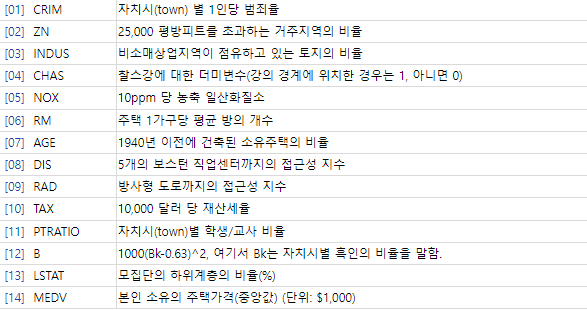  

출처 : http://dator.co.kr/?vid=ctg258&mid=textyle&document_srl=1721307

## 1. Import libraries & Reading the dataset

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
# Reading dataset
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


## 2. Data Analysis

### 2-1. Data Preprocessing

In [3]:
# 데이터 수
df.shape

(506, 14)

In [4]:
# 간단한 describe
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


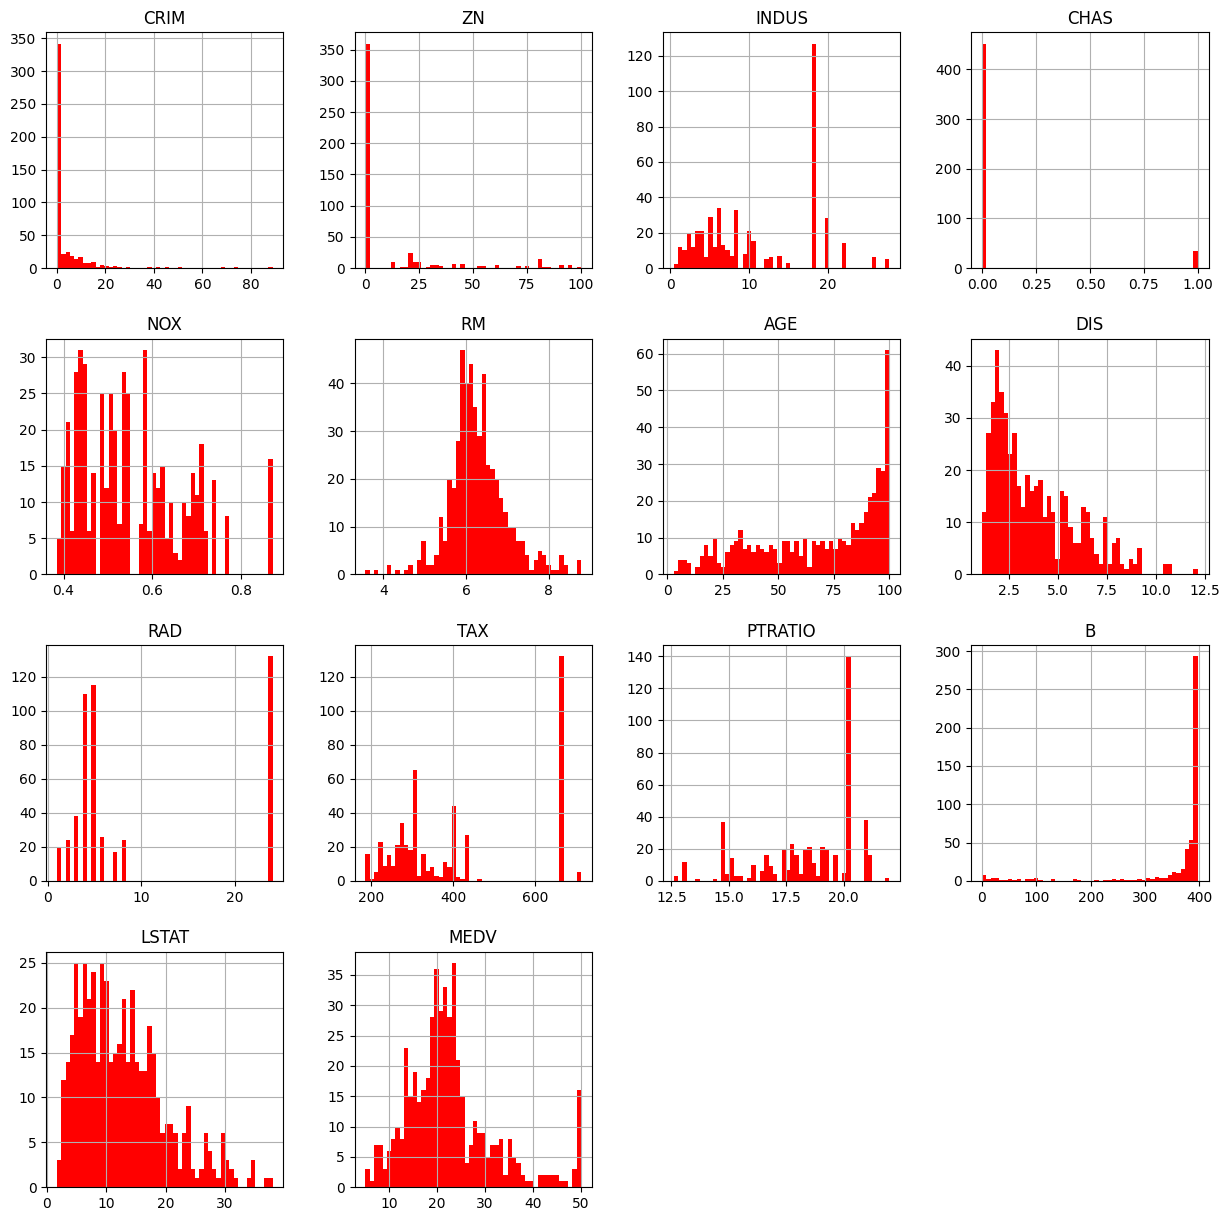

In [5]:
# feature들에 대한 전반적인 histogram
df.hist(bins=50, figsize = (15,15), color = 'red')
plt.show()

In [6]:
# 결측치 확인
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Text(0.5, 1.0, 'CHAS')

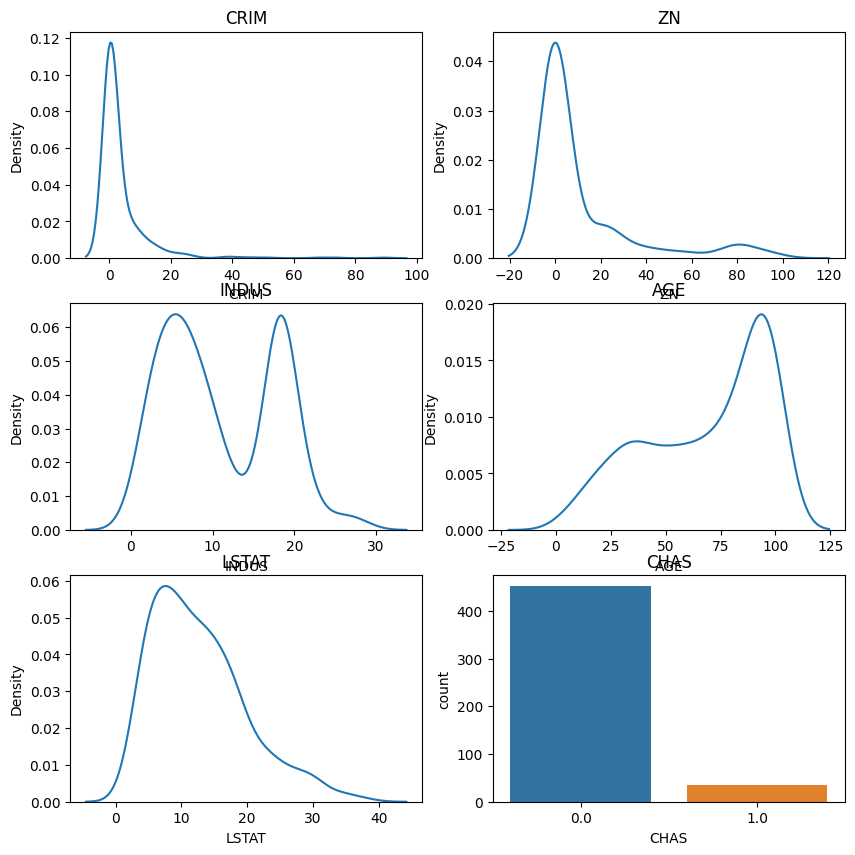

In [7]:
# 결측치 컬럼에 대한 EDA
# 분포도 다시보기, CHAS 변수는 범주형 변수이므로 카운트 플랏으로 시각화
fig, ax = plt.subplots(3, 2, figsize=(10, 10))

sns.kdeplot(df, x='CRIM', ax=ax[0,0])
ax[0,0].set_title('CRIM')

sns.kdeplot(df, x='ZN', ax=ax[0,1])
ax[0,1].set_title('ZN')

sns.kdeplot(df, x='INDUS', ax=ax[1,0])
ax[1,0].set_title('INDUS')

sns.kdeplot(df, x='AGE', ax=ax[1,1])
ax[1,1].set_title('AGE')

sns.kdeplot(df, x='LSTAT', ax=ax[2,0])
ax[2,0].set_title('LSTAT')

sns.countplot(df, x='CHAS', ax=ax[2,1])
ax[2,1].set_title('CHAS')


- `CRIM` 변수 : heavily right-skewed -> median으로 결측치 대체
- `ZN` 변수 : heavily right-skewed, 하지만 median이 0이어서 대체하는 것이 의미가 없음 -> drop 결정
- `INDUS, AGE` 변수 : `INDUS`는 확실한, `AGE`는 약한 bimodality -> drop 결정
- `LSTAT` 변수 : slightly left-skewed -> 위의 decribe에서도 볼 수 있듯이 mean과 median 사이 큰 차이가 없으므로 mean으로 결측치 대체
- `CHAS` 변수 : 범주형 변수, one-hot encoding

In [10]:
# CRIM 변수 결측치 처리- median
df['CRIM'].fillna(df['CRIM'].median(), inplace=True)

In [14]:
# LSTAT 변수 결측치 처리- mean
df['LSTAT'].fillna(df['LSTAT'].mean(), inplace=True)

In [15]:
# 결측치 drop할 행 : ZN, INDUS, AGE
df.dropna(subset = ['ZN', 'INDUS', 'AGE'], inplace=True)

In [16]:
# 최종 점검
df.isna().sum()

CRIM        0
ZN          0
INDUS       0
CHAS       19
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV        0
dtype: int64

<AxesSubplot: >

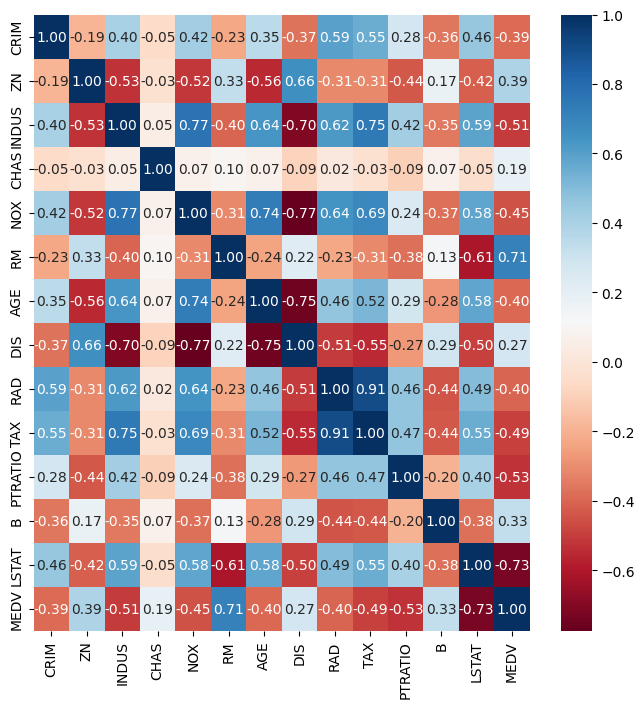

In [17]:
# 상관관계표
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")

In [38]:
# CHAS 범주형 변수 처리
df = pd.get_dummies(df, columns=['CHAS'])

In [40]:
X = df[df.columns.difference(['MEDV'])]
y = df['MEDV']

### 2-3. Train-Test split

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 31)

## 3. Regression modeling

### 3-1. Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [44]:
from sklearn.metrics import r2_score

# Cross-validation score
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Prediction
pred_linear = regressor_linear.predict(X_test)
r2_score_linear = r2_score(y_test, pred_linear)

# RMSE
rmse_linear = (np.sqrt(mean_squared_error(y_test, pred_linear)))


In [45]:
print("CV: ", cv_linear.mean())
print('R2_score (test): ', r2_score_linear)
print("RMSE: ", rmse_linear)

CV:  0.7449688841093498
R2_score (test):  0.5919796965047399
RMSE:  6.215212940832647


### 3-2. Ridge Regression

In [49]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [50]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=3.8))])

In [51]:
# Cross-validation score
cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train, cv = 10)

# Prediction
pred_ridge = ridge_pipe.predict(X_test)
r2_score_ridge = r2_score(y_test, pred_ridge)

# RMSE
rmse_ridge = (np.sqrt(mean_squared_error(y_test, pred_ridge)))

In [52]:
print("CV: ", cv_ridge.mean())
print('R2_score (test): ', r2_score_ridge)
print("RMSE: ", rmse_ridge)

CV:  0.8199352048417736
R2_score (test):  0.7249545491200032
RMSE:  5.102903535574709


### 3-3. LASSO Regression

In [53]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [54]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.012, fit_intercept=True, max_iter=3000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=0.012, max_iter=3000))])

In [55]:
# Cross-validation score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = y_train, cv = 10)

# Prediction
pred_lasso = lasso_pipe.predict(X_test)
r2_score_lasso = r2_score(y_test, pred_lasso)

# RMSE
rmse_lasso = (np.sqrt(mean_squared_error(y_test, pred_lasso)))

c:\Users\rayhw\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.049e+01, tolerance: 2.291e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\rayhw\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.399e+00, tolerance: 2.192e+00
  model = cd_fast.enet_coordinate_descent(


In [56]:
print("CV: ", cv_lasso.mean())
print('R2_score (test): ', r2_score_lasso)
print("RMSE: ", rmse_lasso)

CV:  0.8045838583496439
R2_score (test):  0.7159417676763755
RMSE:  5.185836444501124


## 4. Model comparison

In [60]:
models = [('Linear', rmse_linear, r2_score_linear, cv_linear.mean()), 
('Ridge', rmse_ridge, r2_score_ridge, cv_ridge.mean()),
('Lasso', rmse_lasso, r2_score_lasso, cv_lasso.mean())]

In [61]:
tab = pd.DataFrame(data = models, columns = ['Model', 'RMSE', 'R2_Score', 'Cross-validation'])
tab

,Model,RMSE,R2_Score,Cross-validation
0,Linear,6.215213,0.591980,0.744969
1,Ridge,5.102904,0.724955,0.819935
2,Lasso,5.185836,0.715942,0.804584


(0.0, 1.0)

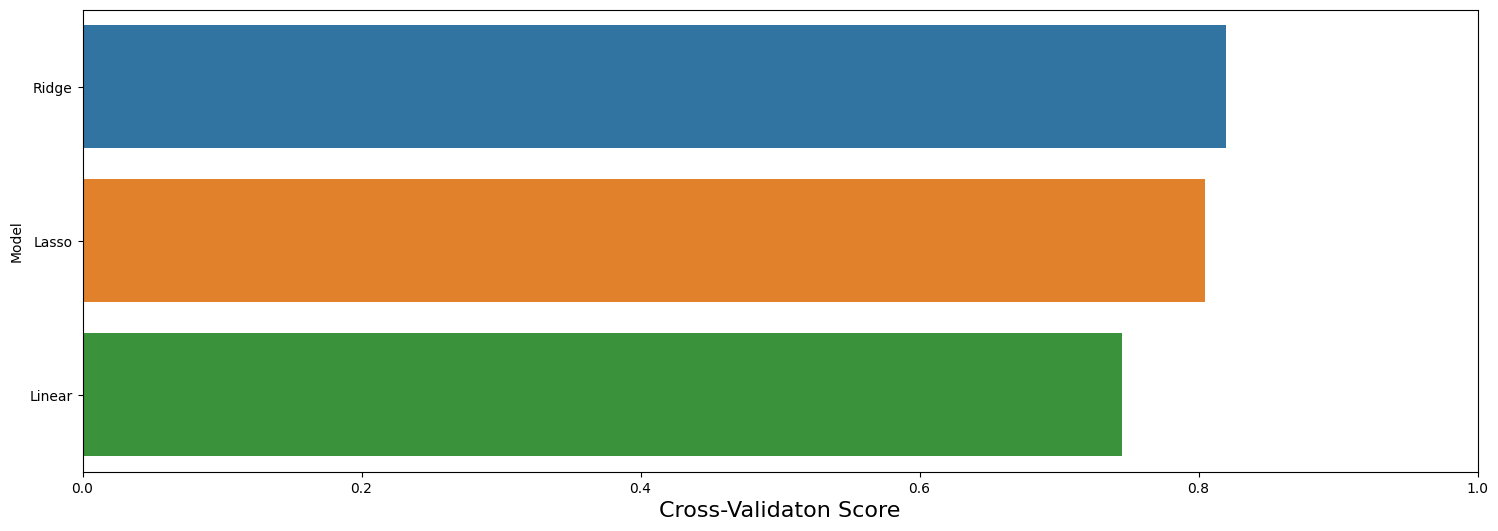

In [66]:
fig, ax = plt.subplots(1,1, figsize=(18,6))
tab.sort_values(by=['Cross-validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-validation', y='Model', data = tab, ax = ax)
#axes[0].set(xlabel='Region', ylabel='Charges')
ax.set_xlabel('Cross-Validaton Score', size=16)
ax.set_ylabel('Model')
ax.set_xlim(0,1.0)

(0.0, 1.0)

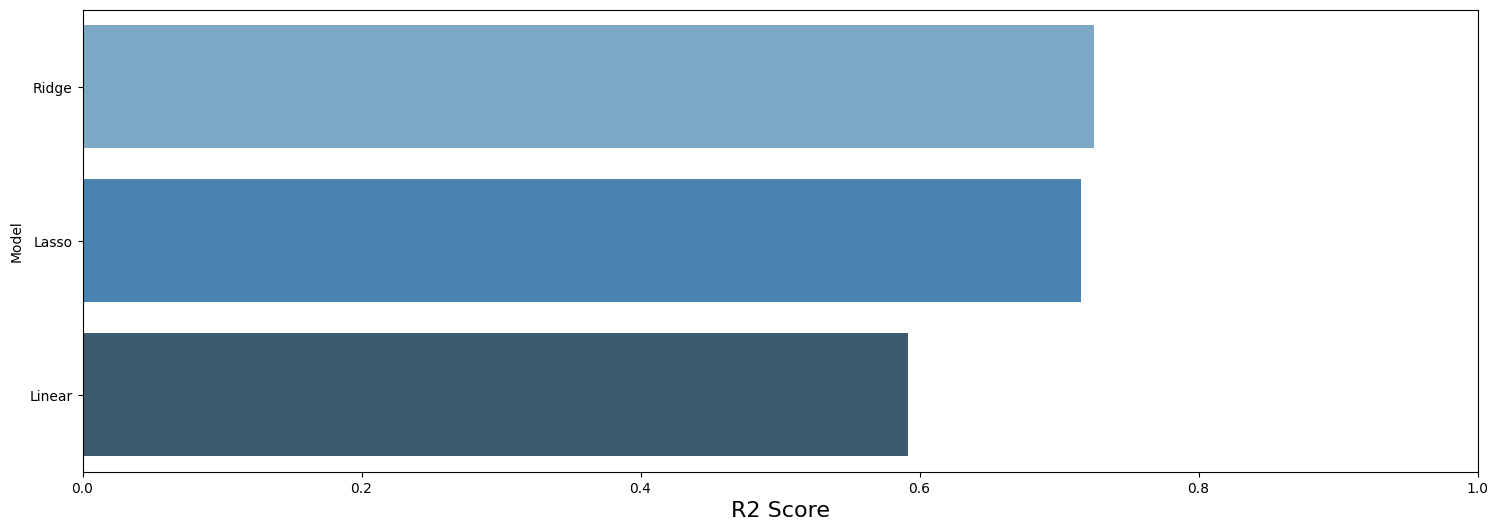

In [69]:
fig, ax = plt.subplots(1,1, figsize=(18,6))
tab.sort_values(by=['R2_Score'], ascending=False, inplace=True)

sns.barplot(x='R2_Score', y='Model', data = tab, palette='Blues_d', ax = ax)
ax.set_xlabel('R2 Score', size=16)
ax.set_ylabel('Model')
ax.set_xlim(0,1.0)

Text(0, 0.5, 'Model')

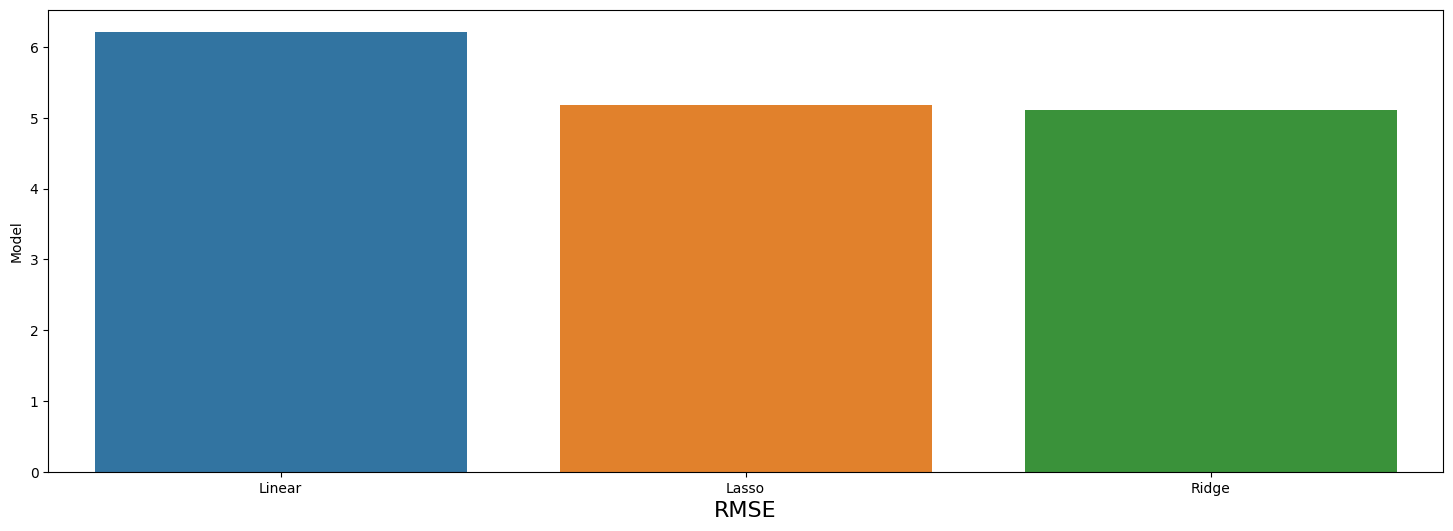

In [73]:
fig, ax = plt.subplots(1,1, figsize=(18,6))
tab.sort_values(by=['RMSE'], ascending=False, inplace=True)

sns.barplot(x='Model', y='RMSE', data = tab, ax = ax)
ax.set_xlabel('RMSE', size=16)
ax.set_ylabel('Model')